# Credit1 - Applied and got credit

This data outlines information about entities that applied for credit and got it.

## Data Variables

 **clid** - rank of (rand) contin
 
 **hhid** - rank of (rand) by a09
 
 **r01** - did you or anyone else in this household attempt to get credit in form of cash
 
 **r02** - did you or anyone else in this household secure a loan (borrow) in form of cash
 
 **r03** - Credit item number
 
 **r04** - Credit item
 
 **r05** - Household member responsible for the loan
 
 **r06** - What was the source of the credit over the last 12 months
 
 **r07** - Main reason of obtaining the loan
 
 **r08** - How much was borrowed
 
 **r09** - How long did it take to obtain the loan
 
 **r10_m** - Rate of interest per month
 
 **r10_y** - Rate of interest per annum
 
 **r11** - Repayment of loan in months
 
 **r12** - How much is outstanding
 
 **r13** - What kind of qurantee/collateral was mainly required

# Import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
credit = pd.read_csv('csv files/Credit1.dta.csv')

In [8]:
credit.head()

,Unnamed: 0,clid,hhid,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10_m,r10_y,r11,r12,r13
0,0,1.0,1.0,Yes,Yes,1.0,EDUCATION LOAN,1.0,Self-Help Groups/Chamas,School Fees (Education),10000.0,NaN,10.0,NaN,6.0,4000.0,Shares
1,1,1.0,2.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Subsistence Needs,10000.0,21.0,10.0,NaN,5.0,0.0,Shares
2,2,1.0,4.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Purchase/Construction of Dwelling,4000.0,2.0,10.0,NaN,4.0,0.0,Shares
3,3,1.0,6.0,Yes,Yes,1.0,NaN,1.0,Self-Help Groups/Chamas,Subsistence Needs,20000.0,7.0,NaN,10.0,12.0,0.0,Livestock
4,4,2.0,3.0,Yes,Yes,1.0,MONEY,1.0,Merchant/Shop,School Fees (Education),20000.0,2.0,0.0,0.0,10.0,2000.0,None


In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9710 entries, 0 to 9709
Data columns (total 17 columns):
Unnamed: 0    9710 non-null int64
clid          9710 non-null float64
hhid          9710 non-null float64
r01           9710 non-null object
r02           9698 non-null object
r03           9421 non-null float64
r04           9342 non-null object
r05           9419 non-null float64
r06           9413 non-null object
r07           9408 non-null object
r08           9411 non-null float64
r09           9382 non-null float64
r10_m         8403 non-null float64
r10_y         6798 non-null float64
r11           9359 non-null float64
r12           9401 non-null float64
r13           8945 non-null object
dtypes: float64(10), int64(1), object(6)
memory usage: 1.3+ MB


In [10]:
credit.describe()

,Unnamed: 0,clid,hhid,r03,r05,r08,r09,r10_m,r10_y,r11,r12
count,9710.000000,9710.000000,9710.000000,9421.000000,9419.000000,9.411000e+03,9382.000000,8403.000000,6798.000000,9359.000000,9.401000e+03
mean,4854.500000,1164.215551,5.129969,1.452287,1.363521,5.989167e+04,10.968770,4.909877,4.705149,8.762795,3.418242e+04
std,2803.179891,695.605797,2.719714,0.951243,0.621285,2.634235e+05,28.528649,14.435655,13.671089,17.234672,1.680969e+05
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2427.250000,541.000000,3.000000,1.000000,1.000000,2.000000e+03,1.000000,0.000000,0.000000,1.000000,0.000000e+00
50%,4854.500000,1159.000000,5.000000,1.000000,1.000000,6.000000e+03,1.000000,0.000000,0.000000,3.000000,1.000000e+03
75%,7281.750000,1780.750000,7.000000,2.000000,2.000000,3.000000e+04,8.000000,10.000000,7.000000,12.000000,1.000000e+04
max,9709.000000,2387.000000,10.000000,9.000000,13.000000,9.000000e+06,730.000000,500.000000,600.000000,998.000000,6.000000e+06


Let's drop the 'Unnamed' column

In [11]:
credit.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
credit.head()

,clid,hhid,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10_m,r10_y,r11,r12,r13
0,1.0,1.0,Yes,Yes,1.0,EDUCATION LOAN,1.0,Self-Help Groups/Chamas,School Fees (Education),10000.0,NaN,10.0,NaN,6.0,4000.0,Shares
1,1.0,2.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Subsistence Needs,10000.0,21.0,10.0,NaN,5.0,0.0,Shares
2,1.0,4.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Purchase/Construction of Dwelling,4000.0,2.0,10.0,NaN,4.0,0.0,Shares
3,1.0,6.0,Yes,Yes,1.0,NaN,1.0,Self-Help Groups/Chamas,Subsistence Needs,20000.0,7.0,NaN,10.0,12.0,0.0,Livestock
4,2.0,3.0,Yes,Yes,1.0,MONEY,1.0,Merchant/Shop,School Fees (Education),20000.0,2.0,0.0,0.0,10.0,2000.0,None


# Missing Data

Use seaborn's heatmap to view missing data

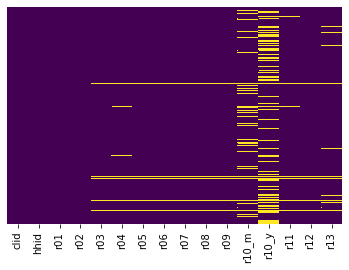

In [13]:
sns.heatmap(credit.isnull(), cbar=False, yticklabels=False, cmap='viridis')

**A method to view the actual no. of missing data points**

In [14]:
for column in credit.columns:
    print(column, '\n', credit[column].isnull().value_counts())
    print('\n')

clid 
 False    9710
Name: clid, dtype: int64


hhid 
 False    9710
Name: hhid, dtype: int64


r01 
 False    9710
Name: r01, dtype: int64


r02 
 False    9698
True       12
Name: r02, dtype: int64


r03 
 False    9421
True      289
Name: r03, dtype: int64


r04 
 False    9342
True      368
Name: r04, dtype: int64


r05 
 False    9419
True      291
Name: r05, dtype: int64


r06 
 False    9413
True      297
Name: r06, dtype: int64


r07 
 False    9408
True      302
Name: r07, dtype: int64


r08 
 False    9411
True      299
Name: r08, dtype: int64


r09 
 False    9382
True      328
Name: r09, dtype: int64


r10_m 
 False    8403
True     1307
Name: r10_m, dtype: int64


r10_y 
 False    6798
True     2912
Name: r10_y, dtype: int64


r11 
 False    9359
True      351
Name: r11, dtype: int64


r12 
 False    9401
True      309
Name: r12, dtype: int64


r13 
 False    8945
True      765
Name: r13, dtype: int64




Note that data start to miss at the 'r02' column onwards

Let's act on each column at a time

In [15]:
# View the no. of unique entries

credit['r02'].nunique()

2

In [16]:
#no. of counts

credit['r02'].value_counts()

Yes    9421
No      277
Name: r02, dtype: int64

**Since this column is somewhat related to the 'r01' column, we may use information on that column to help fill the missing data points**

In [17]:
credit['r02'].fillna('Yes', inplace=True)

In [18]:
credit['r02'].isnull().value_counts()

False    9710
Name: r02, dtype: int64

**Now on to the 'r03' column**

In [19]:
#this column has 289 missing data points

credit['r03'].value_counts()

1.0    6904
2.0    1573
3.0     490
4.0     243
5.0     125
6.0      54
7.0      19
8.0       9
9.0       4
Name: r03, dtype: int64

In [20]:
credit['r03'].isnull().value_counts()

False    9421
True      289
Name: r03, dtype: int64

Let's fill the first approximate half of the data with 1.0 and the other with 2.0

These are the two values in the column that can bring about significant change

In [21]:
credit['r03'][:5000].fillna(value=1.0, inplace=True)
credit['r03'][4999:].fillna(value=2.0, inplace=True)

In [22]:
credit['r03'].isnull().value_counts()

False    9710
Name: r03, dtype: int64

**On to the 'r04' column**

In [23]:
credit['r04'].nunique()

1925

In [24]:
credit['r04'].value_counts()

CASH                   1477
CHAMA LOAN              376
SUGAR                   315
SACCO LOAN              235
FOOD ITEMS              233
                       ... 
SISTER                    1
MILK CO-OP SOCIETY        1
CASH FROM CHURCH          1
ORIEMBO MUHUADH W.G       1
1/2 SACK                  1
Name: r04, Length: 1925, dtype: int64

In [25]:
# CASH seems to be the dorminant variable in this column
# there are 368 missing data points
# these alone are nearly equal to some of the variables total
# so we may fill up all the missing data with CASH

In [26]:
credit['r04'].fillna(value='CASH', inplace=True)

In [27]:
credit['r04'].isnull().value_counts()

False    9710
Name: r04, dtype: int64

**On to the 'r05' column**

In [48]:
# this column is missing 291 data points

credit['r05'].nunique()

11

In [31]:
credit['r05'].value_counts()

1.0     6341
2.0     2897
3.0      109
4.0       32
5.0       15
6.0       13
7.0        7
9.0        2
13.0       1
12.0       1
8.0        1
Name: r05, dtype: int64

In [43]:
# most of the values are 1's and 2's

print(credit['r05'].mean())
print(credit['r05'][:5000].mean())
print(credit['r05'][4999:].mean())

1.3635205435821212
1.3541881045482609
1.3733830300372725


**Let's fill the first approximate half with 1's and the rest with 2's**

In [44]:
credit['r05'][:5000].fillna(value=1.0, inplace=True)

In [45]:
credit['r05'][4999:].fillna(value=2.0, inplace=True)

In [46]:
credit['r05'].isnull().value_counts()

False    9710
Name: r05, dtype: int64

**On to the 'r06' column**

In [47]:
# this column has 297 missing data points

credit['r06'].isnull().value_counts()

False    9413
True      297
Name: r06, dtype: int64

In [54]:
credit['r06'].value_counts() 

 Merchant/Shop                   2364
 Self-Help Groups/Chamas         2070
 Relative/ Friend/Neighbour      1310
 Saccos                          1112
 Commercial Banks                 862
 Micro-Finance Inst               668
 Mobile Phone Platform            483
 Ngo                              126
 Money Lender(Shylock )           119
 Government Funds                 114
 Employer                         106
 Other                             43
 Religious Inst                    30
 Mortgage  Finance                  3
 Insurance Company                  3
Name: r06, dtype: int64

We may divide the data into 4, since the first 4 entries above are the dorminant, then fill each one of them in each quarter as follows

In [56]:
credit['r06'][:2500].fillna(value='Merchant/Shop', inplace=True)
credit['r06'][2499:5000].fillna(value='Self-Help Groups/Chamas', inplace=True)
credit['r06'][4999:7500].fillna(value='Relative/ Friend/Neighbour', inplace=True)
credit['r06'][7499:].fillna(value='Saccos', inplace=True)

In [57]:
credit['r06'].isnull().value_counts()

False    9710
Name: r06, dtype: int64

**On to the 'r07' column**

In [60]:
#this column has 302 missing data points

credit['r07'].isnull().value_counts()

False    9408
True      302
Name: r07, dtype: int64

In [61]:
credit['r07'].value_counts()

Subsistence Needs                       4051
School Fees (Education)                 1891
Business/Investment                     1400
Purchase of Agricultural Inputs          486
Medical Expense                          371
Purchase/Construction of Dwelling        368
Other                                    300
Purchase of Land                         227
Purchase of Livestock                    129
Ceremony/Wedding                          86
Purchase of Motor Vehicles/Cycles         80
Purchase of Agricultural Machinery        19
Name: r07, dtype: int64

**We divide the data into 3(since there are 3 dorminant entries) and fill accordingly**

In [62]:
credit['r07'][:3000].fillna(value='Subsistence Needs', inplace=True)
credit['r07'][2999:6000].fillna(value='School Fees (Education)', inplace=True)
credit['r07'][5999:].fillna(value='Business/Investment', inplace=True)

In [63]:
credit['r07'].isnull().value_counts()

False    9710
Name: r07, dtype: int64

**On to the 'r08' column**

In [64]:
# 299 missing data points

credit['r08'].isnull().value_counts()

False    9411
True      299
Name: r08, dtype: int64